The circuit parameters are:  
Circuit string: R_0-p(R_1,CPE_1)-p(R_2,CPE_2)-Wo_1
Fit: True

Initial guesses:
    R_0 = 1.00e+01 [Ohm]
    R_1 = 1.00e+01 [Ohm]
  CPE_1_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE_1_1 = 1.00e-01 []
    R_2 = 1.00e+01 [Ohm]
  CPE_2_0 = 1.00e-01 [Ohm^-1 sec^a]
  CPE_2_1 = 1.00e-01 []
  Wo_1_0 = 2.00e-01 [Ohm]
  Wo_1_1 = 2.00e-01 [sec]

Fit parameters:
    R_0 = 3.39e-01  (+/- 2.37e+04) [Ohm]
    R_1 = 2.25e-01  (+/- 4.00e-02) [Ohm]
  CPE_1_0 = 5.21e-02  (+/- 1.94e-02) [Ohm^-1 sec^a]
  CPE_1_1 = 6.48e-01  (+/- 7.29e-02) []
    R_2 = 1.25e+01  (+/- 2.56e+07) [Ohm]
  CPE_2_0 = 1.03e+02  (+/- 2.53e+08) [Ohm^-1 sec^a]
  CPE_2_1 = 2.05e-36  (+/- 3.31e-01) []
  Wo_1_0 = 8.41e-01  (+/- 4.41e+05) [Ohm]
  Wo_1_1 = 3.46e+01  (+/- 3.63e+07) [sec]



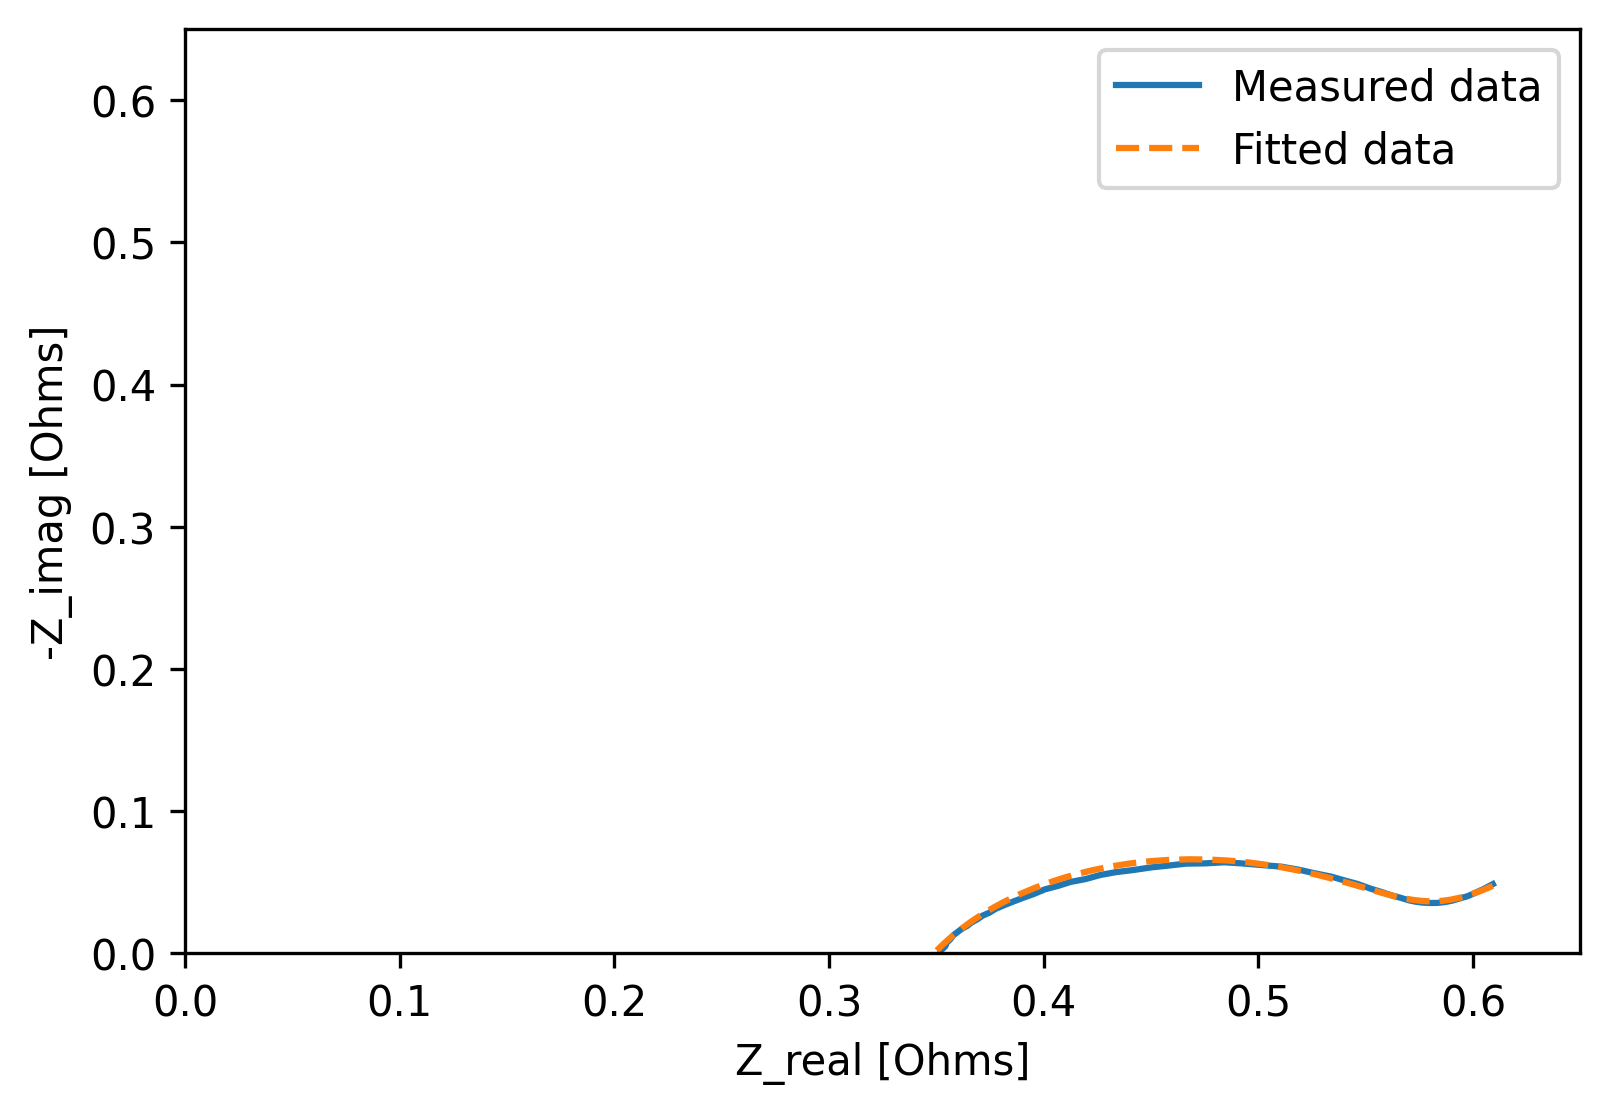

In [13]:
'''The impedance module uses scipy non-linear least squares regression to fit measured data to a circuit model'''

'''First, import all packages. Documentation for the impedance module can be found here: https://impedancepy.readthedocs.io/en/latest/getting-started.html'''
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit

file_dir = "/Users/wesleychang/Desktop/Spring-2024-MEMT680/Spring 2024 MEMT680/"

filenames = ['EIS example.mpt'] #Biologic EIS file 
fig1 = plt.figure(dpi=300, figsize = (6,4))

ax = fig1.add_subplot(111)

for f in filenames:
    frequencies, Z = preprocessing.readBioLogic(file_dir+f) #Use the readBiologic function to import the Biologic .mpt file 

    #Define the circuit. Here, we assume each electrode behaves like a resistor and constant phase element (CPE) in parallel. A CPE has both capacitive and resistive features, and models the behavior of the SEI
    #Lastly, the Warburg models the low frequency diffusion behavior
    circuit = 'R_0-p(R_1,CPE_1)-p(R_2,CPE_2)-Wo_1' 

    #The initial guesses are used for the regression model. Two values are needed for CPE (phase and freq), check documentation 
    initial_guess = [10, 10, 0.1, 0.1, 10, 0.1, 0.1, 0.2, 0.2]

    circuit = CustomCircuit(circuit, initial_guess=initial_guess)
    circuit.fit(frequencies, Z)
    print('The circuit parameters are: ', circuit)

    Z_fit = circuit.predict(frequencies)

    #Plot the real and imaginary components of the impedance
    ax.plot(Z.real, -Z.imag, label='Measured data')
    ax.plot(Z_fit.real, -Z_fit.imag, label='Fitted data',ls = 'dashed') #Plots the fit

#It's standard practice to plot EIS with equal x and y-axis ranges, as the real and imag components are linked and scaled similarly 
ax.set_xlim(0, 0.65)
ax.set_ylim(0, 0.65)
ax.set_xlabel('Z_real [Ohms]')
ax.set_ylabel('-Z_imag [Ohms]')
ax.legend(loc='best')
plt.show()
    